## Import Libraries and Database

In [18]:
# Call the libraries
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl

# Load the database
data = pd.read_csv("CTG.csv")

# Delete the first column
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Create the Dataframe

In [19]:
df_data = pd.DataFrame(data)
df_data = df_data.drop(columns=["NSP"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

## Separate the Dataframe for Training, Testing and Validation

In [20]:
from sklearn.model_selection import train_test_split

# Separate 50% of the data for training
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, random_state=42)

# Separate 25% of the data for validation and 25% for testing
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Find the Best Model

In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

higher_acc = -1
model_score = []
hiden_layer = [(100, 50, 25), (21, 14, 1), (100, 100, 100)]

# Find the best activation function
for i in ('logistic', 'tanh', 'relu'):
        
    # Find the best learning rate
    for k in ('constant', 'invscaling', 'adaptive'):
        
        # Find the best number of iteractions
        for l in range(1000, 2000, 100):
            
            # Find the best number of hidden layers
            for h in hiden_layer:
                
                # Create the model
                clf = MLPClassifier(hidden_layer_sizes=h, activation=i, solver='adam', learning_rate=k, max_iter=l)
                clf.fit(x_train, y_train)
                pred = clf.predict(x_validation)
                acc = accuracy_score(y_validation, pred)
                
                # Save the best model
                if acc > higher_acc:
                    higher_acc = acc
                    best_clf = clf
                    best_activation = i
                    best_learning_rate = k
                    best_iteractions = l
                    best_hidden_layer = h

                # Save the models score
                model_score.append(acc)
            


## Plot the Accuracy of Each Model

Best ACC 0.9096045197740112 
Best activation function:  logistic 
Best learning rate:  constant 
Best iteractions:  1900 
Best hidden layer:  (100, 50, 25)


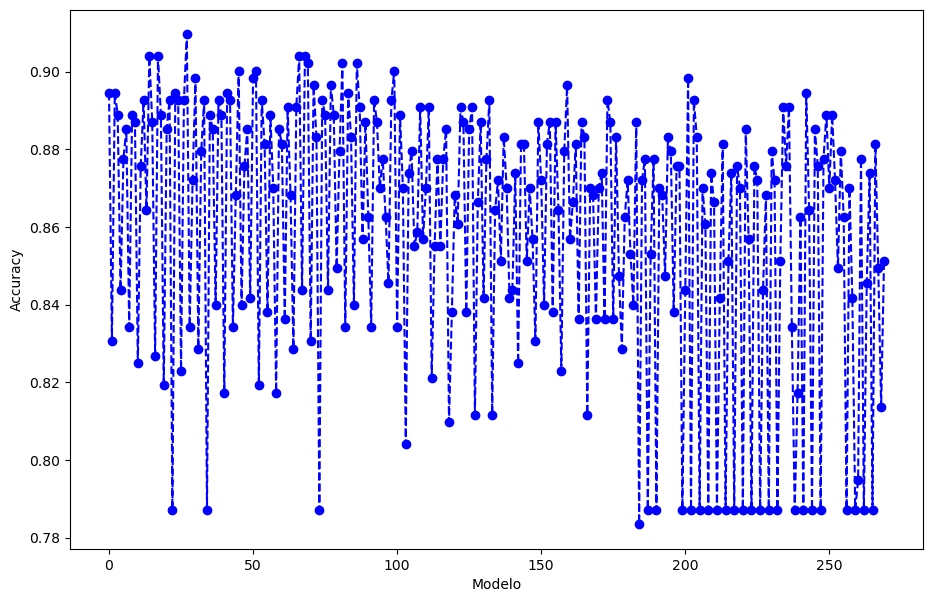

In [22]:
# Graph the accuracy of each model
ptl.figure (figsize=(11,7))
ptl.plot(range(len(model_score)), model_score, color='blue', linestyle='dashed', marker='o')
ptl.xlabel('Modelo')
ptl.ylabel('Accuracy')

# Show the best configuration
print("Best ACC", higher_acc, "\nBest activation function: ", best_activation, "\nBest learning rate: ", best_learning_rate, "\nBest iteractions: ", best_iteractions, "\nBest hidden layer: ", best_hidden_layer)

## Test The Best Model

In [23]:
from sklearn.metrics import confusion_matrix

pred = best_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Acurácia: ", acc)
confusion_matrix(y_test, pred)

Acurácia:  0.9116541353383458


array([[395,  14,   2],
       [ 21,  58,   2],
       [  4,   4,  32]])